#Desafio Bagy Ecommerce 

In [44]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Import csv
data = pd.read_csv ('teste_dados_ecommerce.csv', sep=';', encoding= 'unicode_escape')

# Create DataFrame   
df = pd.DataFrame(data)

# Convert Data Types
df[["StoreId","Quantity","CustomerID","UnitPrice"]] = df[["StoreId","Quantity","CustomerID","UnitPrice"]].apply(pd.to_numeric)
df[["InvoiceNo","StockCode", "Description","Country"]] = df[["InvoiceNo","StockCode", "Description","Country"]].astype(str)
df[["InvoiceDate"]] = df[["InvoiceDate"]].apply(pd.to_datetime)

df

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,9,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,7,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,14,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,7,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,17,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Exercício 1

- Quais as 10 lojas com maior faturamento em pedidos? Sumarize os dados dessa loja apresentando os seguintes campos:
    - StoreId
    - Volume total de itens vendidos
    - Valor total vendido

In [22]:
data.describe()

,StoreId,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,10.489785,9.552250,4.611114,15287.690570
std,5.766334,218.081158,96.759853,1713.600303
min,1.000000,-80995.000000,-11062.060000,12346.000000
25%,5.000000,1.000000,1.250000,13953.000000
50%,10.000000,3.000000,2.080000,15152.000000
75%,15.000000,10.000000,4.130000,16791.000000
max,20.000000,80995.000000,38970.000000,18287.000000


In [24]:
data.corr()

,StoreId,Quantity,UnitPrice,CustomerID
StoreId,1.000000,-0.001245,0.000400,-0.001757
Quantity,-0.001245,1.000000,-0.001235,-0.003600
UnitPrice,0.000400,-0.001235,1.000000,-0.004560
CustomerID,-0.001757,-0.003600,-0.004560,1.000000


<AxesSubplot:xlabel='StoreId'>

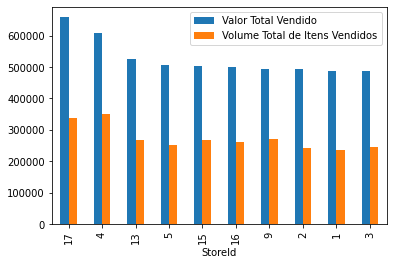

In [32]:
#Criando a Coluna Total Vendido
df['TotalPrice'] = df.UnitPrice * df.Quantity

top_10_faturamento = (
    df.groupby(['StoreId'])[['TotalPrice','Quantity']]
    .sum()
    .reset_index()
    .rename(columns={'TotalPrice': 'Valor Total Vendido', 'Quantity': 'Volume Total de Itens Vendidos'})
    .sort_values(by='Valor Total Vendido', ascending=False)
    .head(10)
)

top_10_faturamento.plot(x ='StoreId', y=['Valor Total Vendido','Volume Total de Itens Vendidos'], kind = 'bar')

## Exercício 2

- Qual ticket médio mensal dos pedidos apresentados? Qual o volume médio mensal de vendas (todas as lojas) ?

In [38]:
df['AnoMes'] = df['InvoiceDate'].map(lambda x: 100*x.year + x.month)

ticket_medio = (
    df.groupby(['AnoMes'])
    ['TotalPrice'].sum()
    .reset_index()
)

ticket_medio.head()

,AnoMes,TotalPrice
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121


<AxesSubplot:xlabel='AnoMes'>

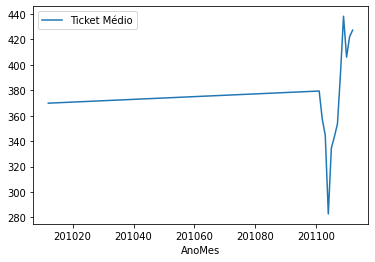

In [76]:
ticket_medio = df.groupby('AnoMes').agg({'TotalPrice':'sum', 
                         'InvoiceNo':'nunique'}).reset_index()

ticket_medio['Ticket Médio'] = ticket_medio.TotalPrice / ticket_medio.InvoiceNo

ticket_medio[['AnoMes','Ticket Médio']].plot(x ='AnoMes', y='Ticket Médio', kind = 'line')

<AxesSubplot:xlabel='StoreId'>

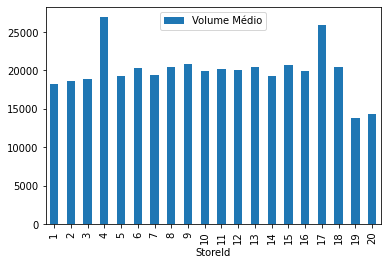

In [83]:
volume_medio_por_loja = df.groupby('StoreId').agg({'Quantity':'sum', 
                         'AnoMes':'nunique'}).reset_index()


volume_medio_por_loja['Volume Médio'] = volume_medio_por_loja.Quantity / volume_medio_por_loja.AnoMes


volume_medio_por_loja[['StoreId', 'Volume Médio']].plot(x='StoreId', y='Volume Médio', kind='bar')

## Exercício 3

- Existe alguma correlação entre o país e o volume de itens vendidos? Qual o item mais vendido e o menos vendido no país com maior volume de vendas?


<AxesSubplot:xlabel='Country'>

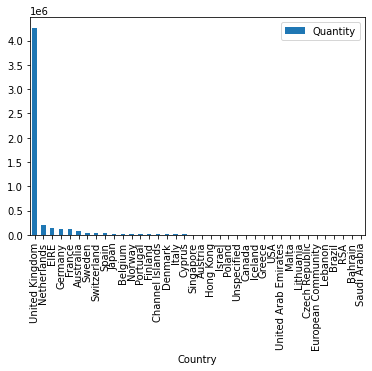

In [86]:
paises_volume_itens = (
   df.groupby(['Country'])[['Quantity']]
   .sum()
   .reset_index()
   .sort_values(by='Quantity', ascending=False)
)

paises_volume_itens.plot(x='Country', y='Quantity', kind='bar')

In [87]:
paises_volume_itens.corr()

,Quantity
Quantity,1.0


In [89]:
top_pais = (
    df.groupby(['Country'])[['Quantity']]
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
    .iloc[[0]]
)

top_pais.tail(1)['Country'].values[0]

'United Kingdom'

In [98]:
df = df.loc[df["Quantity"] >0]
df = df.loc[df['Country'] == top_pais.tail(1)['Country'].values[0]]
produtos_mais_e_menos_vendidos = (
    df.groupby(['Description'])[['Quantity']]
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
)


### Produto mais vendido do United Kingdom

In [99]:
produtos_mais_e_menos_vendidos.head(1)

,Description,Quantity
2390,"PAPER CRAFT , LITTLE BIRDIE",80995


### Produto menos vendido do United Kingdom

In [102]:
produtos_mais_e_menos_vendidos.tail(1)

,Description,Quantity
3228,SET OF THREE VINTAGE GIFT WRAPS,1


## Exercício 4 

- Extra - A partir dos números apresentados e o seu conhecimento prévio, apresente ideais/estratégias que podem ser  implementadas para auxiliar nossos lojistas a aumentarem o volume de vendas?

### Extra - Resposta

Com base na análise de dados entende-se que as maiores vendas de produtos se concentram no Reino Unido em relação aos outros países. 
Como proposta de solução seria uma análise mais profunda que conseguisse identificar o motivo das vendas nos outros países serem tão baixas em relação ao Reino Unido e assim aplicarem a melhor estratégia para o aumento do volume de vendas.

Através da análise foi possível identificar que nas lojas existem muitos produtos descartáveis e sem estoque.
Dessa forma, minha solução seria construir modelos preditivos para diminuir o descarte desses produtos defeituosos e também aumentar a eficiência da produção e a qualidade do produto. Como consequência aumentar a demanda e solucionar problemas que contém internamente nas lojas.
     
Proposta: 
- Melhorar a fabricação do produto.
- Melhorar agilidade na produção.
- Buscar sempre inovar e trazer as melhores ideias do mercado.
- Campanhas.
- Promoções.
- Melhoria do Website.
- Incentivo ao cliente na compra via portal.

A principal ideia é expandir as vendas através de outros países. Porém, primeiramente é necessário melhorar o planejamento para o crescimento das lojas na parte interna investindo na qualidade do produto e solucionando os problemas para aumentar a produção e evitar descarte dos produtos e aumentar a demanda.
